In [3]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline
import matplotlib.pyplot as plt

#pd.read_excel("./credit_card_dataset.xls")
dataset = pd.read_csv("./credit_cards_dataset.csv")

In [4]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
#Checking for missing values
for column in dataset:
    if dataset[column].isnull().values.any():
        print("NaN value/s detected in "+column)

In [6]:
#In GENDER column in the dataset the gender was presenting in 1 or 2 
#value for male / female so we are changing it to be 0 and 1
dataset = dataset.rename(columns={"PAY_0": "PAY_1"})

In [7]:
data = dataset.drop('default.payment.next.month',axis=1)
outcome = dataset['default.payment.next.month']

In [8]:
#Looking into the data in depth and check the Min, Max values. looking into the mean and the Standard Deviation
dataset[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [9]:
#Bill amounts
dataset[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [12]:
#Defining methods

dataset['SEX'] =  [ 0 if x==1 else 1 for x in data['SEX']]
data['SEX']= dataset['SEX']

## this method will print the percentage of the defaulted account 
# @param : defaulted_count, total_count, label
def calculate_percentage (default_count, total_count,label):
    print("Percentage of {} is {} %".format(label,((total_count * 100) / default_count)))

## this method will get the columns and will take input the prefix and will add the Numerical part to it ( from 1 to 6 )
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

No handles with labels found to put in legend.


Percentage of Graduate school Default is 19.23476617855456 %
Percentage of University Default is 23.734853884533145 %
Percentage of High school Default is 25.157616432784216 %
Percentage of Others Default is 5.691056910569106 %


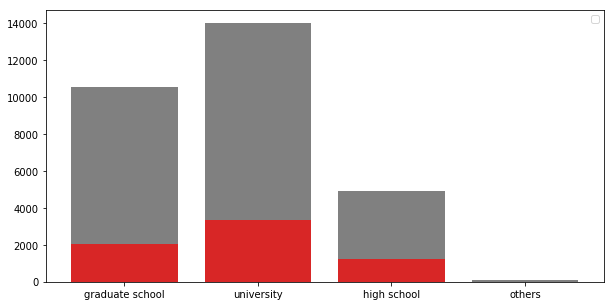

In [16]:
#Visualizing the data
#(1 = graduate school; 2 = university; 3 = high school; 4 = others)
# preparing the vairable for the diagram
_EDUCATION_RANGE= [1,2,3,4]
plt.figure(figsize=(10,5))

school= dataset['EDUCATION'][data['EDUCATION']==1].count()
school_default = dataset['EDUCATION'][(dataset['EDUCATION']==1)&(dataset['default.payment.next.month'])].count()

university= dataset['EDUCATION'][data['EDUCATION']==2].count()
university_default = dataset['EDUCATION'][(dataset['EDUCATION']==2)&(dataset['default.payment.next.month'])].count()

high_school= dataset['EDUCATION'][data['EDUCATION']==3].count()
high_school_default = dataset['EDUCATION'][(dataset['EDUCATION']==3)&(dataset['default.payment.next.month'])].count()

others= dataset['EDUCATION'][data['EDUCATION']==4].count()
others_default = dataset['EDUCATION'][(dataset['EDUCATION']==4)&(dataset['default.payment.next.month'])].count()

education_total = [school,university,high_school,others]
default_education_total=  [school_default,university_default,high_school_default,others_default] 


plt.bar(_EDUCATION_RANGE , education_total,color='grey')
plt.bar(_EDUCATION_RANGE , default_education_total,color='red', alpha = 0.7)
plt.xticks(_EDUCATION_RANGE,['graduate school','university','high school','others'])
calculate_percentage(school,school_default,"Graduate school Default")
calculate_percentage(university,university_default,"University Default")
calculate_percentage(high_school,high_school_default,"High school Default")
calculate_percentage(others,others_default,"Others Default")


plt.legend()
plt.show()

No handles with labels found to put in legend.


Gender / Default


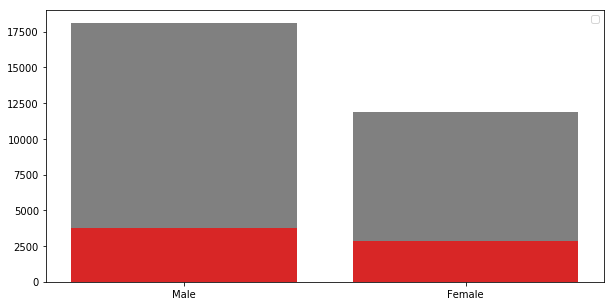

Percentage of Male Default is 20.776280918727917 %
Percentage of Female Default is 24.167227456258413 %


In [17]:
# male = 0 , female = 1
# preparing the vairable for the diagram
print("Gender / Default")
plt.figure(figsize=(10,5))
_GENDER_RANGE= [0,1]

male= dataset['SEX'][data['SEX']==0].count()
male_default = dataset['SEX'][(dataset['SEX']==0)&(dataset['default.payment.next.month']==1)].count()

female=dataset['SEX'][data['SEX']==1].count()
female_default = dataset['SEX'][(dataset['SEX']==1)&(dataset['default.payment.next.month']==1)].count()

gender_total = [male,female]
default_gender_total = [male_default,female_default]

plt.bar(_GENDER_RANGE,gender_total, color='grey')
plt.bar(_GENDER_RANGE,default_gender_total, color='red',alpha = 0.7)
plt.xticks([0,1],['Male','Female'])

plt.legend()
plt.show()
calculate_percentage(male,male_default,"Male Default")
calculate_percentage(female,female_default,"Female Default")

No handles with labels found to put in legend.


Marriage / Default


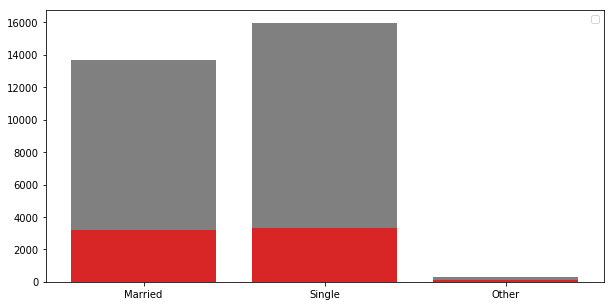

Percentage of Married Default is 23.471703638626547 %
Percentage of Single Default is 20.928338762214985 %
Percentage of Others Default is 26.006191950464395 %


In [18]:
# 1=married, 2=single, 3=others
# preparing the vairable for the diagram
print("Marriage / Default")
_MARRIAGE_RANGE= [1,2,3]
plt.figure(figsize=(10,5))

married= dataset['MARRIAGE'][data['MARRIAGE']==1].count()
married_default = dataset['MARRIAGE'][(dataset['MARRIAGE']==1)&(dataset['default.payment.next.month']==1)].count()

single=dataset['MARRIAGE'][data['MARRIAGE']==2].count()
single_default = dataset['MARRIAGE'][(dataset['MARRIAGE']==2)&(dataset['default.payment.next.month']==1)].count()

others=dataset['MARRIAGE'][data['MARRIAGE']==3].count()
others_default = dataset['MARRIAGE'][(dataset['MARRIAGE']==3)&(dataset['default.payment.next.month']==1)].count()


marriage_total = [married,single,others]
default_marriage_total = [married_default,single_default,others_default]

plt.bar(_MARRIAGE_RANGE,marriage_total, color='grey')
plt.bar(_MARRIAGE_RANGE,default_marriage_total, color='red',alpha = 0.7)
plt.xticks([1,2,3],['Married','Single','Other'])
plt.legend()
plt.show()

calculate_percentage(married,married_default,"Married Default")
calculate_percentage(single,single_default,"Single Default")
calculate_percentage(others,others_default,"Others Default")


No handles with labels found to put in legend.


Marriage / Gender / Default


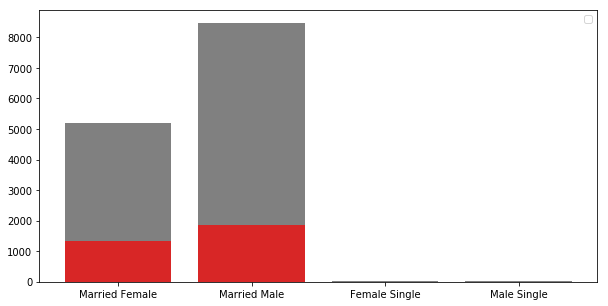

Percentage of Married Female Default is 25.934489402697494 %
Percentage of Married Male Default is 21.96245129295076 %
Percentage of Single Female Default is 14.285714285714286 %
Percentage of Single Male Default is 7.5 %


In [19]:
# 1=married, 2=single, 3=others
# preparing the vairables for the diagram 
print("Marriage / Gender / Default")
plt.figure(figsize=(10,5))
_MARRIAGE_RANGE= [1,2,3,4]

female_married= dataset['MARRIAGE'][(data['MARRIAGE']==1)&(data['SEX']==1)].count()
female_married_default = dataset['MARRIAGE'][(dataset['MARRIAGE']==1)&(dataset['default.payment.next.month']==1)&(data['SEX']==1)].count()

male_married= dataset['MARRIAGE'][(data['MARRIAGE']==1)&(data['SEX']==0)].count()
male_married_default = dataset['MARRIAGE'][(dataset['MARRIAGE']==1)&(dataset['default.payment.next.month']==1)&(data['SEX']==0)].count()

female_single= dataset['MARRIAGE'][(data['MARRIAGE']==0)&(data['SEX']==1)].count()
female_single_default = dataset['MARRIAGE'][(dataset['MARRIAGE']==0)&(dataset['default.payment.next.month']==1)&(data['SEX']==1)].count()

male_single= dataset['MARRIAGE'][(data['MARRIAGE']==0)&(data['SEX']==0)].count()
male_single_default = dataset['MARRIAGE'][(dataset['MARRIAGE']==0)&(dataset['default.payment.next.month']==1)&(data['SEX']==0)].count()


marriage_gender_total = [female_married,male_married,female_single,male_single]
default_marriage_gender_total = [female_married_default,male_married_default,female_single_default,male_single_default]

plt.bar(_MARRIAGE_RANGE,marriage_gender_total, color='grey')
plt.bar(_MARRIAGE_RANGE,default_marriage_gender_total, color='red',alpha = 0.7)
plt.xticks(_MARRIAGE_RANGE,['Married Female','Married Male','Female Single', 'Male Single'])
plt.legend()
plt.show()

calculate_percentage(female_married,female_married_default,"Married Female Default")
calculate_percentage(male_married,male_married_default,"Married Male Default")
calculate_percentage(female_single,female_single_default,"Single Female Default")
calculate_percentage(male_single,male_single_default,"Single Male Default")


Age / Default


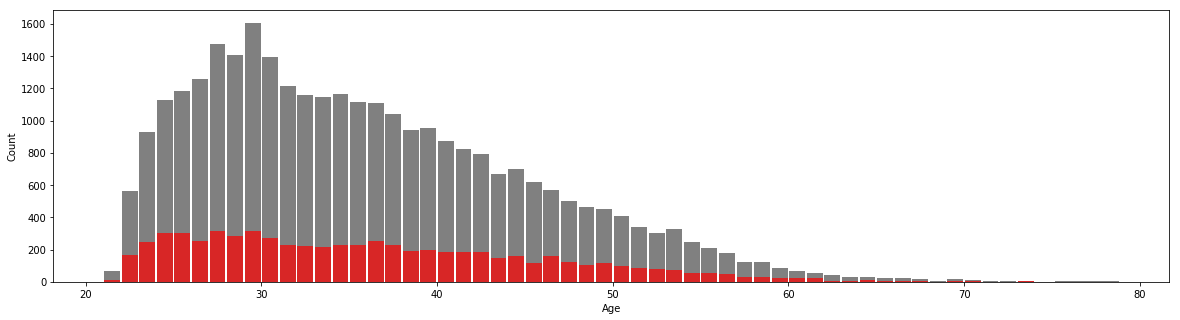

Percentage of 21 is 20.895522388059703 %
Percentage of 22 is 30.178571428571427 %
Percentage of 23 is 26.53061224489796 %
Percentage of 24 is 26.619343389529725 %
Percentage of 25 is 25.463743676222595 %
Percentage of 26 is 20.143312101910826 %
Percentage of 27 is 21.19160460392688 %
Percentage of 28 is 20.298083747338538 %
Percentage of 29 is 19.501557632398754 %
Percentage of 30 is 19.6415770609319 %
Percentage of 31 is 18.816762530813477 %
Percentage of 32 is 19.430051813471504 %
Percentage of 33 is 18.760907504363 %
Percentage of 34 is 19.879518072289155 %
Percentage of 35 is 20.305480682839175 %
Percentage of 36 is 22.924187725631768 %
Percentage of 37 is 21.998078770413063 %
Percentage of 38 is 20.550847457627118 %
Percentage of 39 is 20.859538784067087 %
Percentage of 40 is 21.49425287356322 %
Percentage of 41 is 22.45145631067961 %
Percentage of 42 is 23.299748110831235 %
Percentage of 43 is 22.388059701492537 %
Percentage of 44 is 23.142857142857142 %
Percentage of 45 is 18.80

In [25]:
#percentage of people in default per age
print("Age / Default")
plt.figure(figsize=(20,5))
plt.hist(data['AGE'], sorted(data['AGE'].unique()),rwidth=0.9, color ='grey')
plt.hist(dataset['AGE'][(dataset['default.payment.next.month']==1)], sorted(data['AGE'].unique()),rwidth=0.9,color='red',alpha = 0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

age_persentage_dataframe = pd.DataFrame(columns=['Age', 'Percentage'])

for x in sorted(data['AGE'].unique()):
    calculate_percentage(
                         dataset['AGE'][dataset['AGE']==x ].count(),dataset['AGE'][(dataset['AGE']==x )&(dataset['default.payment.next.month']==1)].count(), x)

Limit Balance / Default


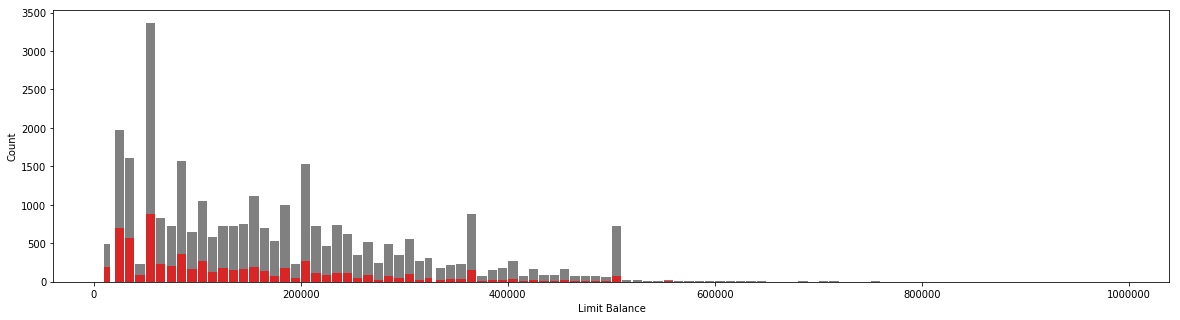

<Figure size 1440x72 with 0 Axes>

In [21]:
#LIMIT_BAL

print("Limit Balance / Default")
plt.figure(figsize=(20,5))
plt.hist(data['LIMIT_BAL'], sorted(data['LIMIT_BAL'].unique()),rwidth=0.9, color ='grey')
plt.hist(dataset['LIMIT_BAL'][(dataset['default.payment.next.month']==1)], sorted(data['LIMIT_BAL'].unique()),rwidth=0.9,color='red',alpha = 0.7)
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.figure(figsize=(20,1))
plt.show()

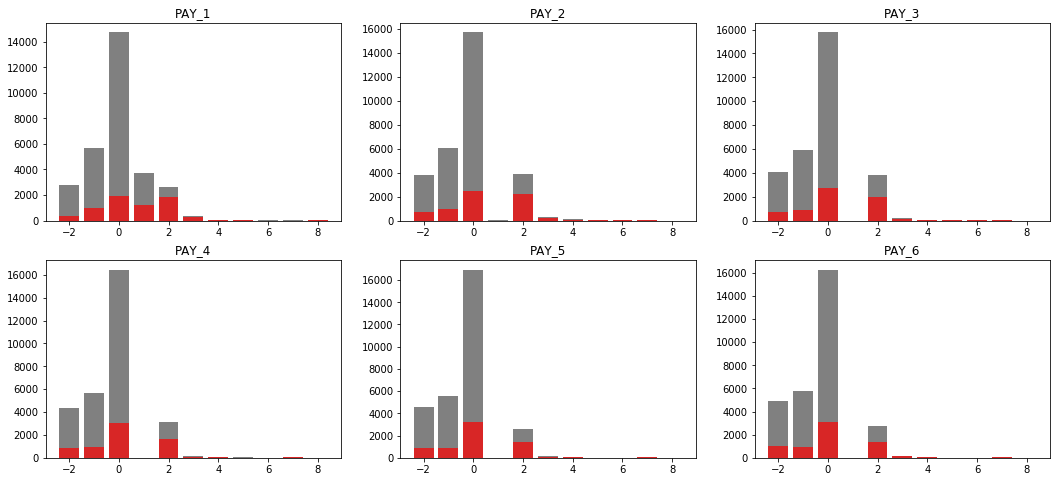

In [22]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = dataset[pay_status_columns[i]].value_counts()
    x = dataset[pay_status_columns[i]][(dataset['default.payment.next.month']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='grey')
    ax[row,col].bar(x.index, x, align='center', color='red', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

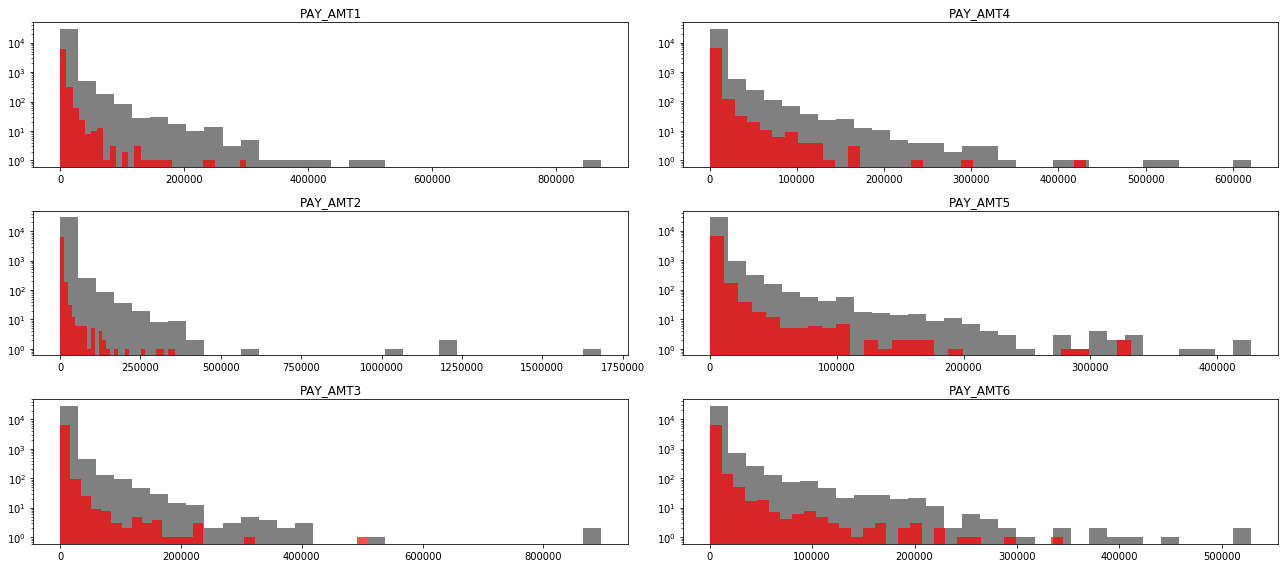

In [23]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[pay_amt_columns[i]], 30, color ='grey')
    ax[row,col].hist(dataset[pay_amt_columns[i]][(dataset['default.payment.next.month']==1)],30,color='red',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more reader friendly
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

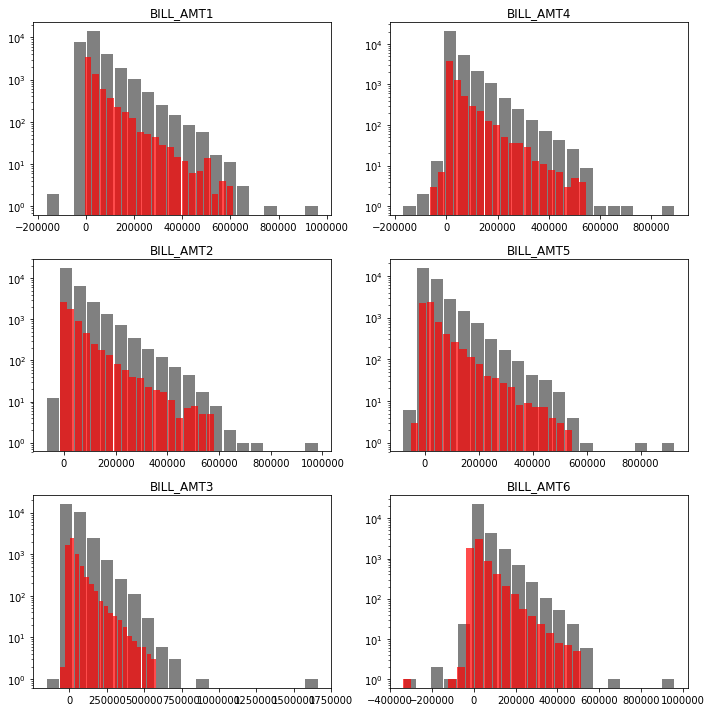

In [24]:
# BILL_AMT1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
#(1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(dataset[bill_atm_columns[i]], 20,rwidth=0.9, color ='grey')
    ax[row,col].hist(dataset[bill_atm_columns[i]][(dataset['default.payment.next.month']==1)],20,rwidth=0.9,color='red',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more reader friendly
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

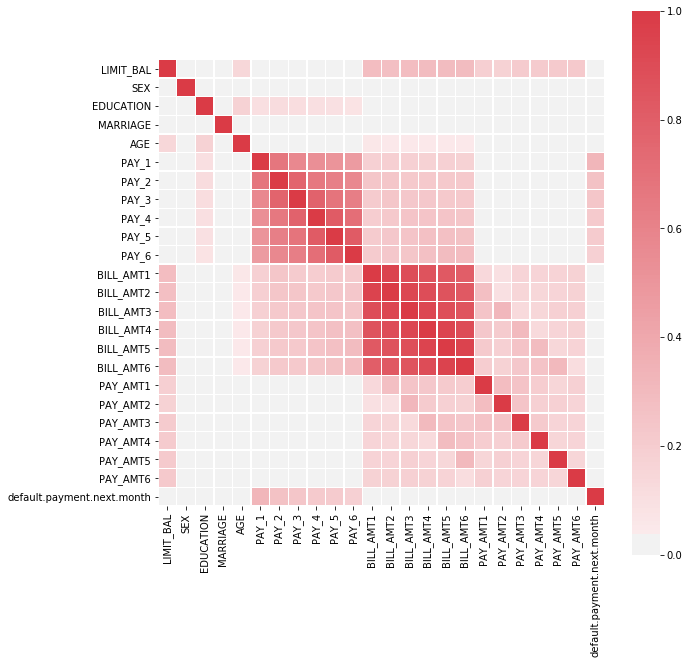

In [18]:
#after looking at the result from the heat map it's clearly showing corelation between 
#pay column and also between bill amount column
import seaborn as sns

corr = dataset.drop('ID',axis=1).corr()
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=0,vmax=1, center=0,
            square=True, linewidths=.5)

In [19]:
#working with algorthims to have a a more accurate prediction.. result adventuring with Random Forest 
#and am targeting to get a score close to 80% i got the following result
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from  sklearn.cross_validation import train_test_split



X = data
Y = outcome
x_train,x_test,y_train,y_test = train_test_split(data,outcome,test_size=0.25,random_state=0)

clf = RandomForestClassifier(random_state=41)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print("Score : %{} using {}".format(score*100, 'RandomForestClassifier'))

clf = GradientBoostingClassifier(random_state=41,n_estimators=10,max_depth=4)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print("Score : %{} using {}".format(score*100, 'GradientBoostingClassifier'))

clf = AdaBoostClassifier(random_state=41,n_estimators=15)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print("Score : %{} using {}".format(score*100, 'AdaBoostClassifier'))

# adding setting the max_leaf_nodes imporved the acccuracy from 78 to 82 
clf = DecisionTreeClassifier(random_state=41,max_leaf_nodes=3)
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print("Score : %{} using {}".format(score*100, 'DecisionTreeClassifier'))



ModuleNotFoundError: No module named 'sklearn.cross_validation'